# Preuve par récurrence


## Définition : principe de récurrence

Soit $\mathcal P(n)$ une propriété portant sur $n \in \mathbb N$ (ou $\mathbb N^{*}$). Pour montrer que $\mathcal P(n)$ est vraie pour **tout** $n$, on procède en deux étapes :

1. **Initialisation** : on vérifie que $\mathcal P(0)$ (ou $\mathcal P(1)$) est vraie.  
2. **Hérédité** : on montre que $\forall n\ge 0,\; \mathcal P(n)\Longrightarrow\mathcal P(n+1)$.

Si ces deux étapes sont satisfaites, alors $\mathcal P(n)$ est vraie pour tout $n$.

### Pourquoi est‑ce utile en *Machine Learning* ?

- De nombreux **algorithmes itératifs** (propagation en avant, descente de gradient, RNN, moyenne incrémentale, etc.) se décrivent par une **récurrence**.  
- Le principe de récurrence permet de **prouver des invariants** : convergence, borne d’erreur, conservation d’une norme, etc.  
- Il justifie les formules « en ligne » qu’on emploie pour le *streaming* ou le *federated learning*.



## Exemple 1 : somme des $n$ premiers entiers

Montrer que $\displaystyle S(n)=\sum_{k=1}^n k = \frac{n(n+1)}{2}$ pour tout $n\ge 1$.

**Preuve (récurrence)**  
*Initialisation* : pour $n=1$, $S(1)=1=\frac{1\cdot2}{2}$ — vrai.  
*Hérédité* : supposons la formule vraie à l'ordre $n$ ; alors  
$$S(n+1)=S(n)+(n+1)=\frac{n(n+1)}{2}+(n+1)=\frac{(n+1)(n+2)}{2}$$  
La propriété est donc vraie pour $n+1$.  
Par récurrence, la formule est vraie $\forall n\ge 1$.


In [1]:

import numpy as np

def S(n):
    return np.arange(1, n+1).sum()

for n in [1, 5, 10]:
    print(f"S({n}) = {S(n)} \t formule = {n*(n+1)//2}")


S(1) = 1 	 formule = 1
S(5) = 15 	 formule = 15
S(10) = 55 	 formule = 55



## Exemple 2 : moyenne incrémentale (streaming)

On reçoit un flux d’observations $x_1, x_2,\dots$.  
On souhaite maintenir la **moyenne** $\mu_n=\frac1n\sum_{i=1}^n x_i$ **sans tout stocker**.

Récurrence :  
$$\mu_n \;=\; \mu_{n-1} + \frac{x_n-\mu_{n-1}}{n}$$

### Preuve par récurrence

- *Base* : pour $n=1$, $\mu_1 = x_1$ — la formule donne $\mu_1 = \mu_{0}+\frac{x_1-\mu_0}{1}=0+x_1$.  
- *Hérédité* : supposons $\mu_{n-1}$ correcte. Alors
  $$
  \mu_n
  =\frac1n\bigl( (n-1)\mu_{n-1}+x_n \bigr)
  =\frac{n-1}{n}\mu_{n-1}+\frac{x_n}{n}
  =\mu_{n-1}+\frac{x_n-\mu_{n-1}}{n}.
  $$
  La formule est donc correcte pour $n$.

Ainsi la mise à jour incrémentale calcule bien la vraie moyenne à tout instant : un résultat fondamental pour les **algorithmes en ligne** (ex. statistiques de lot mini‐batch, normalisation, suivi de dérive).


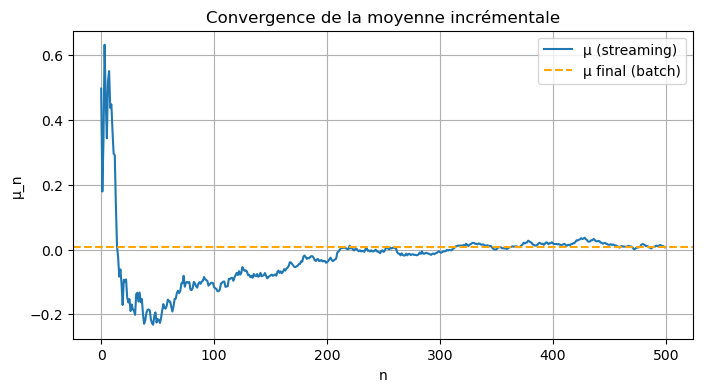

In [2]:

import numpy as np
import matplotlib.pyplot as plt

# Générons un "flux" de données IID ~ N(0,1)
np.random.seed(42)
N = 500
data = np.random.randn(N)

mu_stream = np.zeros(N)
mu = 0.0
for n, x in enumerate(data, start=1):
    mu += (x - mu) / n
    mu_stream[n-1] = mu

# Moyenne "batch" pour comparaison
mu_batch = np.cumsum(data) / np.arange(1, N+1)

# Vérification
assert np.allclose(mu_stream, mu_batch)

# Visualisation
plt.figure(figsize=(8,4))
plt.plot(mu_stream, label="μ (streaming)")
plt.axhline(mu_batch[-1], color="orange", linestyle="--", label="μ final (batch)")
plt.title("Convergence de la moyenne incrémentale")
plt.xlabel("n")
plt.ylabel("μ_n")
plt.legend(); plt.grid(True)
plt.show()



## Conclusion

La **preuve par récurrence** est un outil mathématique clé pour démontrer la validité de formules et d’algorithmes **itératifs** — omniprésents en *Machine Learning*.  
Elle garantit que les propriétés établies (convergence, exactitude, bornes) restent vraies à chaque itération du processus.
